# Library & Data Loading

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Output hidden; open in https://colab.research.google.com to view.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/BI Bootcamp/Final Project/thelook_data.csv')

# Data Quick Look

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63116 entries, 0 to 63115
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     63116 non-null  int64  
 1   age         63116 non-null  int64  
 2   gender      63116 non-null  object 
 3   country     63116 non-null  object 
 4   source      63116 non-null  object 
 5   order_id    63116 non-null  int64  
 6   quantity    63116 non-null  int64  
 7   created_at  63116 non-null  object 
 8   product_id  63116 non-null  int64  
 9   price       63116 non-null  float64
 10  category    63116 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.3+ MB


In [5]:
data.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category
0,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00 UTC,4715,58.000000,Jeans
1,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00 UTC,11341,79.989998,Intimates
2,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00 UTC,12397,30.950001,Intimates
3,60200,26,M,Brasil,Search,75511,1,2021-12-31 01:02:00 UTC,23975,55.000000,Outerwear & Coats
4,60200,26,M,Brasil,Search,75511,1,2021-12-31 01:02:00 UTC,16444,44.990002,Tops & Tees


In [6]:
data.tail()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category
63111,3735,60,M,France,Search,4625,1,2022-12-31 18:59:00 UTC,19380,95.989998,Sweaters
63112,3735,60,M,France,Search,4625,1,2022-12-31 18:59:00 UTC,23026,27.320000,Shorts
63113,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178 UTC,11774,26.000000,Intimates
63114,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178 UTC,6342,46.000000,Shorts
63115,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178 UTC,15841,13.750000,Plus


In [7]:
data.describe()

,user_id,age,order_id,quantity,product_id,price
count,63116.000000,63116.000000,63116.000000,63116.000000,63116.000000,63116.000000
mean,49944.130110,40.950044,62448.041749,1.681222,15333.570648,59.481645
std,28757.143989,16.968130,35955.854930,0.978548,8387.315000,66.120003
min,7.000000,12.000000,12.000000,1.000000,1.000000,0.020000
25%,25285.000000,26.000000,31595.000000,1.000000,8109.750000,24.500000
50%,49874.000000,41.000000,62348.000000,1.000000,16056.000000,39.990002
75%,74742.000000,56.000000,93412.250000,2.000000,22598.000000,69.900002
max,99999.000000,70.000000,124980.000000,4.000000,29119.000000,999.000000


In [8]:
data.shape

(63116, 11)

# Data Cleaning

## Change Data Type

from the `data.info` we knew that `created_at` column has wrong data type, it should be datetime type, so we need to change that

or, cause the datatype is object, and for this analysis we just need the date, so we can remove the UTC and split just from year to date. 

In [9]:
data['created_at'] = data['created_at'].str.replace('UTC','')

In [10]:
data['date'] = data['created_at'].str[:10]

In [11]:
data['date'] = pd.to_datetime(data['date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63116 entries, 0 to 63115
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     63116 non-null  int64         
 1   age         63116 non-null  int64         
 2   gender      63116 non-null  object        
 3   country     63116 non-null  object        
 4   source      63116 non-null  object        
 5   order_id    63116 non-null  int64         
 6   quantity    63116 non-null  int64         
 7   created_at  63116 non-null  object        
 8   product_id  63116 non-null  int64         
 9   price       63116 non-null  float64       
 10  category    63116 non-null  object        
 11  date        63116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 5.8+ MB


In [13]:
data.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date
0,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,4715,58.000000,Jeans,2021-12-31
1,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,11341,79.989998,Intimates,2021-12-31
2,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,12397,30.950001,Intimates,2021-12-31
3,60200,26,M,Brasil,Search,75511,1,2021-12-31 01:02:00,23975,55.000000,Outerwear & Coats,2021-12-31
4,60200,26,M,Brasil,Search,75511,1,2021-12-31 01:02:00,16444,44.990002,Tops & Tees,2021-12-31


choose just Jan - Des 2022 data

In [14]:
data2 = data[data['date']>'2021-12-31']

In [15]:
data2.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date
74,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,13407,42.000000,Swim,2022-01-01
75,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,2199,52.000000,Fashion Hoodies & Sweatshirts,2022-01-01
76,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,12220,14.990000,Intimates,2022-01-01
77,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,3954,114.989998,Dresses,2022-01-01
78,10371,64,M,Germany,Search,12846,3,2022-01-01 01:14:00,17468,25.000000,Fashion Hoodies & Sweatshirts,2022-01-01


In [16]:
data2.tail()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date
63111,3735,60,M,France,Search,4625,1,2022-12-31 18:59:00,19380,95.989998,Sweaters,2022-12-31
63112,3735,60,M,France,Search,4625,1,2022-12-31 18:59:00,23026,27.320000,Shorts,2022-12-31
63113,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178,11774,26.000000,Intimates,2022-12-31
63114,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178,6342,46.000000,Shorts,2022-12-31
63115,81139,39,F,United States,Search,101460,2,2022-12-31 19:43:24.359178,15841,13.750000,Plus,2022-12-31


In [17]:
data2['user_id'].value_counts().sum()

63042

## Missing Value

In [18]:
data2.isna().sum()

user_id       0
age           0
gender        0
country       0
source        0
order_id      0
quantity      0
created_at    0
product_id    0
price         0
category      0
date          0
dtype: int64

## Duplicated

In [19]:
data2.duplicated().sum()

5

In [20]:
data2 = data2.drop_duplicates()

# Data Exploration

## Age

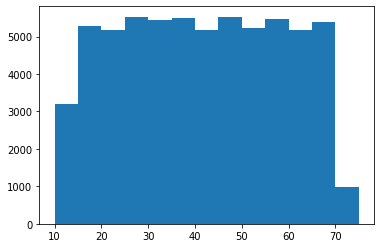

In [21]:
plt.hist(data2['age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75])
plt.show()

the first and the last group of age have a big gap between the other group of age, while the other group has nearly the same amount. it can be caused by the 10-15 age commonly they just asking their parents to order their stuff, and people in 70-75 age maybe have struggled to use their phone or make an order for themself, so they're more like to look for their stuff in an offline store

In [22]:
age_counts = data2['age'].value_counts()

In [23]:
fig = px.bar(age_counts, title="Age Distribution") 
fig.update_layout( xaxis_title = "Age", yaxis_title = "Frequency", title_x = 0.5, showlegend = False ) 
fig.show(renderer='colab')

## Gender

In [24]:
gender_counts = data2['gender'].value_counts()

In [25]:
fig = px.bar(gender_counts, title="Gender Distribution")
fig.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

gender doesn't have any big gap 

## Country

In [26]:
data2['country'].value_counts()

China             21389
United States     14342
Brasil             9683
South Korea        3383
United Kingdom     2800
France             2620
Germany            2563
Spain              2265
Japan              1685
Australia          1267
Belgium             864
Poland              171
Colombia              4
Austria               1
Name: country, dtype: int64

In [27]:
country_counts = data2['country'].value_counts()

In [28]:
fig = px.bar(country_counts, title="Country Distribution")
fig.update_layout(
    xaxis_title = "Country",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

highest shipping from China with over than 21.3K in a year followed by US and Brazil. company can boost their profit on this country by using the right marketing strategic considering they have a lot of customer on these countries

## Trafic Source

In [29]:
source_counts = data2['source'].value_counts()

In [30]:
fig = px.bar(source_counts, title="Source Distribution")
fig.update_layout(
    xaxis_title = "Source",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

71% of orders on last year dominated by `search` source. it means company's marketing channel performance is need to be increased

## Day of Orders

### Extract Days of Week

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63037 entries, 74 to 63115
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     63037 non-null  int64         
 1   age         63037 non-null  int64         
 2   gender      63037 non-null  object        
 3   country     63037 non-null  object        
 4   source      63037 non-null  object        
 5   order_id    63037 non-null  int64         
 6   quantity    63037 non-null  int64         
 7   created_at  63037 non-null  object        
 8   product_id  63037 non-null  int64         
 9   price       63037 non-null  float64       
 10  category    63037 non-null  object        
 11  date        63037 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 6.3+ MB


In [32]:
data2['days'] = data2['date'].dt.day_name()

In [33]:
data2.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date,days
74,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,13407,42.000000,Swim,2022-01-01,Saturday
75,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,2199,52.000000,Fashion Hoodies & Sweatshirts,2022-01-01,Saturday
76,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,12220,14.990000,Intimates,2022-01-01,Saturday
77,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,3954,114.989998,Dresses,2022-01-01,Saturday
78,10371,64,M,Germany,Search,12846,3,2022-01-01 01:14:00,17468,25.000000,Fashion Hoodies & Sweatshirts,2022-01-01,Saturday


In [34]:
day_counts = data2['days'].value_counts()

In [35]:
fig = px.bar(day_counts, title="Day Created Distribution")
fig.update_layout(
    xaxis_title = "Days",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

the company better do the marketing or the advertisement on Saturday because it was the highest day to order last year

## Price

In [36]:
data2['price'].describe()

count    63037.000000
mean        59.487082
std         66.145437
min          0.020000
25%         24.500000
50%         39.990002
75%         69.900002
max        999.000000
Name: price, dtype: float64

the price of the product have min price on 0.02 dollar dan max 999 dollar 

## Category Product

In [37]:
data2['category'].value_counts()

Intimates                        4685
Jeans                            4325
Tops & Tees                      4090
Swim                             4050
Shorts                           4039
Fashion Hoodies & Sweatshirts    3952
Sleep & Lounge                   3910
Sweaters                         3869
Accessories                      3362
Active                           3117
Outerwear & Coats                3073
Underwear                        2660
Pants                            2548
Socks                            2233
Dresses                          1954
Suits & Sport Coats              1774
Maternity                        1701
Plus                             1451
Socks & Hosiery                  1377
Pants & Capris                   1153
Leggings                         1137
Blazers & Jackets                1104
Skirts                            660
Suits                             373
Jumpsuits & Rompers               354
Clothing Sets                      86
Name: catego

In [38]:
category_counts = data2['category'].value_counts()

In [39]:
fig = px.bar(category_counts, title="Product Category Distribution")
fig.update_layout(
    xaxis_title = "Category Product",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

# Data Preparation

since we need to make new columns of RFM which is Recency, Frekuensi, and Monetary Value, so we need to preparation the data.
* Recency -> last order date (last `created_date` or `date`)
* Frequency -> count of `order_id`
* Monetary value -> total spend (`quantity` * `price`)

All data need to be aggregate or groupby `id`

## Recency

In [40]:
data2['date'] = data2['date'].dt.date

In [41]:
last = data2['date'].max()
last

datetime.date(2022, 12, 31)

 we knew that the last order was '2021-12-31', so we set this date as our last order date

In [42]:
import datetime as dt
NOW = dt.date(2022,12,31)

## Frequency

we need to count the order id and group it by the id(user_id)

## Monetary Value

make the new column for total spending

In [43]:
data2['total'] = data2['quantity']*data2['price']
data2.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date,days,total
74,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,13407,42.000000,Swim,2022-01-01,Saturday,42.000000
75,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,2199,52.000000,Fashion Hoodies & Sweatshirts,2022-01-01,Saturday,52.000000
76,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,12220,14.990000,Intimates,2022-01-01,Saturday,14.990000
77,43341,26,F,Spain,Search,54225,1,2022-01-01 00:13:00,3954,114.989998,Dresses,2022-01-01,Saturday,114.989998
78,10371,64,M,Germany,Search,12846,3,2022-01-01 01:14:00,17468,25.000000,Fashion Hoodies & Sweatshirts,2022-01-01,Saturday,75.000000


# Table RFM

## Aggregate by Customer ID

In [44]:
rfmTable = data2.groupby('user_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'total': lambda x: x.sum()}) # Monetary Value

rfmTable['date'] = rfmTable['date'].astype(int)
rfmTable.rename(columns={'date': 'recency', 
                         'order_id': 'frequency', 
                         'total': 'monetary_value'}, inplace=True)

tips: using the same datatype for aggregate the date, of `NOW` using datetime, so the `x.max` should be datetime too

In [45]:
rfmTable

,recency,frequency,monetary_value
user_id,,,
7,68,2,90.980000
12,42,4,149.299999
18,171,1,89.500000
22,171,1,135.000000
24,22,6,619.080002
...,...,...,...
99987,143,1,26.990000
99988,147,4,811.959991
99991,96,6,2017.199997


### table validation

In [46]:
data2[data2['user_id']==7]

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date,days,total
43461,7,68,F,United States,Search,12,1,2022-10-24 07:39:00,7418,46.00,Skirts,2022-10-24,Monday,46.00
43462,7,68,F,United States,Search,12,1,2022-10-24 07:39:00,14711,44.98,Maternity,2022-10-24,Monday,44.98


In [47]:
(NOW - dt.date(2022,10,24)).days==68

True

the table is correct!

## Determining RFM Quartiles

In [48]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [49]:
quantiles

,recency,frequency,monetary_value
0.25,39.25,1.0,46.990000
0.50,107.00,2.0,118.000000
0.75,206.00,4.0,309.172499


In [50]:
quantiles = quantiles.to_dict()

In [51]:
quantiles

{'recency': {0.25: 39.25, 0.5: 107.0, 0.75: 206.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'monetary_value': {0.25: 46.99000024795532,
  0.5: 118.0,
  0.75: 309.1724989414215}}

# Creating Segmentation Table

In [52]:
rfmSegmentation = rfmTable

In [53]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


why we make 2 dictionary to mapping the score? because `recency` has a different meaning, the smaller of the value of `recency` or the the quartile 1 have a highest score than the customer on the quartile 4

**the smaller of the value, the better score it gets**

In [54]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [55]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [56]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
7,68,2,90.980000,2,3,3,233
12,42,4,149.299999,2,2,2,222
18,171,1,89.500000,3,4,3,343
22,171,1,135.000000,3,4,2,342
24,22,6,619.080002,1,1,1,111




---



# Specification

In [57]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending = False).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
35816,16,21,7806.559998,1,1,1,111
99339,22,16,6244.919998,1,1,1,111
70161,26,8,5867.939987,1,1,1,111
85451,9,28,5849.360100,1,1,1,111
74961,20,8,5766.450005,1,1,1,111
37367,12,24,5711.309990,1,1,1,111
33529,1,16,5268.720001,1,1,1,111
1827,18,24,5036.579973,1,1,1,111
90012,36,24,5011.119934,1,1,1,111


In [58]:
data_check = rfmSegmentation[['recency','frequency','monetary_value', 'R_Quartile', 'F_Quartile', 'M_Quartile']]

In [59]:
data_check1 = data_check[(data_check['R_Quartile']==1) & (data_check['F_Quartile']==1) & (data_check['M_Quartile']==1)]
data_check2 = data_check[(data_check['R_Quartile']==2) & (data_check['F_Quartile']==2) & (data_check['M_Quartile']==2)]
data_check3 = data_check[(data_check['R_Quartile']==3) & (data_check['F_Quartile']==3) & (data_check['M_Quartile']==3)]
data_check4 = data_check[(data_check['R_Quartile']==4) & (data_check['F_Quartile']==4) & (data_check['M_Quartile']==4)]

In [60]:
data_check1.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
count,1008.00000,1008.000000,1008.000000,1008.0,1008.0,1008.0
mean,15.81746,9.858135,1096.065923,1.0,1.0,1.0
std,11.61713,4.484411,887.946701,0.0,0.0,0.0
min,0.00000,5.000000,309.900009,1.0,1.0,1.0
25%,6.00000,6.000000,539.877489,1.0,1.0,1.0
50%,14.00000,8.000000,804.390009,1.0,1.0,1.0
75%,25.00000,12.000000,1323.017506,1.0,1.0,1.0
max,39.00000,36.000000,7806.559998,1.0,1.0,1.0


In [61]:
data_check2.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
count,471.000000,471.000000,471.000000,471.0,471.0,471.0
mean,70.794055,3.643312,205.870786,2.0,2.0,2.0
std,19.467760,0.479531,54.507914,0.0,0.0,0.0
min,40.000000,3.000000,118.880001,2.0,2.0,2.0
25%,53.000000,3.000000,157.990000,2.0,2.0,2.0
50%,70.000000,4.000000,204.000000,2.0,2.0,2.0
75%,87.000000,4.000000,246.480003,2.0,2.0,2.0
max,107.000000,4.000000,308.790009,2.0,2.0,2.0


In [62]:
data_check3.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
count,558.000000,558.0,558.000000,558.0,558.0,558.0
mean,153.643369,2.0,81.104068,3.0,3.0,3.0
std,28.218818,0.0,19.656606,0.0,0.0,0.0
min,108.000000,2.0,47.099998,3.0,3.0,3.0
25%,130.250000,2.0,65.380001,3.0,3.0,3.0
50%,153.000000,2.0,80.000000,3.0,3.0,3.0
75%,177.000000,2.0,97.694999,3.0,3.0,3.0
max,206.000000,2.0,118.000000,3.0,3.0,3.0


In [63]:
data_check4.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
count,1598.000000,1598.0,1598.000000,1598.0,1598.0,1598.0
mean,282.194618,1.0,26.108085,4.0,4.0,4.0
std,45.068614,0.0,11.038100,0.0,0.0,0.0
min,207.000000,1.0,1.950000,4.0,4.0,4.0
25%,244.000000,1.0,16.969999,4.0,4.0,4.0
50%,281.000000,1.0,25.000000,4.0,4.0,4.0
75%,320.000000,1.0,34.990002,4.0,4.0,4.0
max,364.000000,1.0,46.959999,4.0,4.0,4.0


note that: 

- data_check1: 
  - recency = 0 hari - 39 hari = 39 hari (range 10hari an)
  - frequency = 5 kali - 36 kali =  gap 31 kali (1 , 2, 4, 24)
  - monetary = 309.900009 - 7806.559998 = 7.496,659989

- data_check2: 
  - recency = 40hari - 107 hari = 66 hari (range 15.5hari an / step)
  - frequency = 3 kali - 4 kali = 1 kali 
  - monetary = 118.880001 - 309.900009 = 191,020008

- data_check3:
  - recency = 108 hari - 206 hari = 98 hari (range 24hari an / step)
  - frequency = 2 kali - 2 kali 
  - monetary = 47.099998 - 118.000000  = 70,9 

- data_check4:
  - recency = 207 hari - 364 hari = 157 hari (range 40hari an / step)
  - frequency = 1 kali - 1 kali
  - monetary = 1.950000 - 46.959999 = 45,009999

# Implementation

In [64]:
rfmSegmentation['Segment'] = pd.to_numeric(rfmSegmentation['RFMClass'])

In [65]:
rfmSegmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22210 entries, 7 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         22210 non-null  int64  
 1   frequency       22210 non-null  int64  
 2   monetary_value  22210 non-null  float64
 3   R_Quartile      22210 non-null  int64  
 4   F_Quartile      22210 non-null  int64  
 5   M_Quartile      22210 non-null  int64  
 6   RFMClass        22210 non-null  object 
 7   Segment         22210 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [66]:
rfmSegmentation

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
user_id,,,,,,,,
7,68,2,90.980000,2,3,3,233,233
12,42,4,149.299999,2,2,2,222,222
18,171,1,89.500000,3,4,3,343,343
22,171,1,135.000000,3,4,2,342,342
24,22,6,619.080002,1,1,1,111,111
...,...,...,...,...,...,...,...,...
99987,143,1,26.990000,3,4,4,344,344
99988,147,4,811.959991,3,2,1,321,321
99991,96,6,2017.199997,2,1,1,211,211


In [67]:
#make a function to segmented the RFMClass to the Segment Guide

def segment(x):
    if x == 111:
      return 'Best'
    elif x == 112 or x == 211 or x == 122 or x == 222:
      return 'Potential'
    elif x == 121 or x ==131 or x ==141 or x ==221 or x ==231 or x ==241 or x == 311 or x ==321 or x ==331 or x ==341 or x == 411 or x ==421 or x ==431 or x ==441:
      return 'Big Spender'
    elif x == 113 or x == 114 or x == 212 or x == 213 or x == 214 or x == 312 or x == 313 or x == 314 or x == 412 or x == 413 or x == 414:
      return 'Loyal'
    elif x == 322 or x == 323 or x == 324 or x == 332 or x == 333 or x == 334 or x == 342 or x == 343 or x == 344: 
      return 'Almost Lost'
    elif x == 422 or x == 423 or x == 424 or x == 432 or x == 433 or x == 442:
      return 'Lost Customers'
    elif x == 444 or x == 443 or x == 434:
      return 'Lost Cheap'
    else:
      return 'Others'

rfmSegmentation['Class'] = rfmSegmentation['Segment'].apply(segment)

311 & 411 yang harus nya masuk ke almost lost sama lost customers, kayanya tetep bagus dimasukin ke big spender, why? karna mungkin customer tipe ini nih beliya barang2 yang ga mungkin keluar model baru setiap hari, karna ecommerce ini basic nya jual pakian, jadi mungkin dia tu belinya seasonal barang2 mewah, contoh beli blazer channel edisi spring. kan keluar modelnya ga setiap hari atau setiap bulan. 

**Customers Segment Guide:**
- 111 = Best Customers
- 112, 122, 211, 222 = Potential Customers
- XX1 = Big Spender
- X1X = Loyal Customers
- 3XX = Almost Lost (Hibernation)
- 4XX = Lost Customers
- 434, 443, 444 = Lost Cheap
- Lainnya (1XX & 2XX) = Others

**Reason:**
- 111 = dia tuh best banget di semua sisi, jadi perlu diapresiasi.
- 112, 122, 211, 222 = dasarnya mereka ini punya karakteristik yang sering beli dan lumanyan barusan beli tapi spendnya ga terlalu banyak, kalo belinya ga terlalu barusan-barusan banget tapi spend sama sering belinya tu banyak, jadi ini tu pelanggan yang potensial banget buat naik ke Best Customer
- XX1 = dia spend banyak banget terlepas berapa kalipun dia belanja atau seberapa barusan dia belanja di kita.
- X1X = dia tipe yang sering banget belanja di kita
- 3XX = hampir hilang, karna yang recency kelas 3 ini tuh hampir 6 bulan, jadi di dikasih pertimbangan buat mau di marketing atau tidak
-4XX = hilang, sudah setaun ga beli, terserah pimpinan mau di treatment atau engga
- 434, 443, 444 = lost and cheap, jadi menurut saya ga perlu spend budget banyak ke tipe ini
- Lainnya (1XX & 2XX) = mereka baru beli dan pengerluarannya juga ga seberapa, jadi ga usah di treatmen juga, dengan harapannya bisa balik sendiri.


In [68]:
segment_counts = rfmSegmentation['Class'].value_counts()
segment_counts

Others            6556
Almost Lost       4158
Big Spender       3779
Lost Cheap        2665
Potential         1903
Lost Customers    1836
Best              1008
Loyal              305
Name: Class, dtype: int64

In [69]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Class
user_id,,,,,,,,,
7,68,2,90.980000,2,3,3,233,233,Others
12,42,4,149.299999,2,2,2,222,222,Potential
18,171,1,89.500000,3,4,3,343,343,Almost Lost
22,171,1,135.000000,3,4,2,342,342,Almost Lost
24,22,6,619.080002,1,1,1,111,111,Best


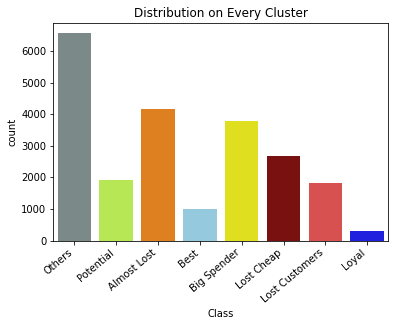

In [195]:
#pal = ['#EE3B3B', '#FFFF00', '#8B0000', '#87CEEB', '#7A8B8B', '#FF8000', '#C0FF3E', '#EE3B3B']
pal = ['#7A8B8B', '#C0FF3E', '#FF8000', '#87CEEB', '#FFFF00', '#8B0000', '#EE3B3B', '#0000FF']
pl = sns.countplot(x = rfmSegmentation['Class'], palette= pal)
pl.set_xticklabels(pl.get_xticklabels(), rotation=40, ha="right")
pl.set_title("Distribution on Every Cluster")
plt.show()

In [71]:
fig = px.bar(segment_counts, title="Segment Distribution")
fig.update_layout(
    xaxis_title = "Segment",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show(renderer='colab')

# K-Means

## Check Outliers

In [72]:
#data RFM
data_rfm = rfmSegmentation[['recency','frequency','monetary_value']]

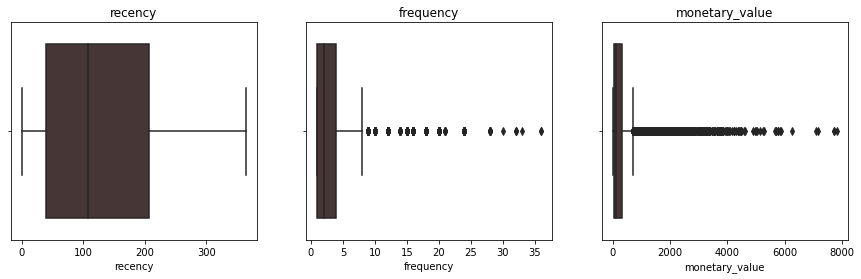

In [73]:
column=['recency','frequency','monetary_value']
def plotting_boxplot(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(data_rfm[col], color = '#483434')
        plt.title(col)
        i = i+1
    plt.show()
plotting_boxplot(column)

ada data outliers, namun saya memilih untuk tidak dibuang karna nantinya kita akan kehilangan data-data pelanggan

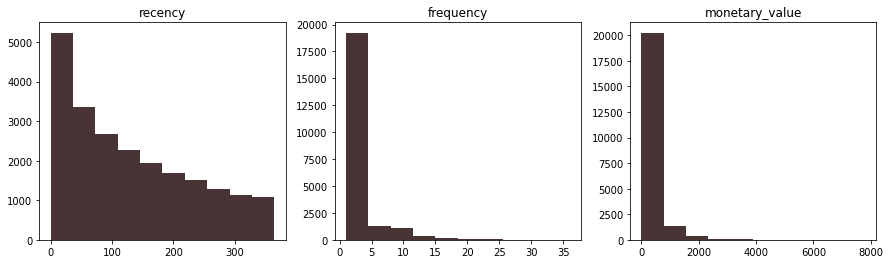

In [74]:
column=['recency','frequency','monetary_value']
def plotting_boxplot(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        plt.hist(data_rfm[col], color = '#483434')
        plt.title(col)
        i = i+1
    plt.show()
plotting_boxplot(column)

In [75]:
data_rfm.describe()

,recency,frequency,monetary_value
count,22210.000000,22210.000000,22210.000000
mean,129.853174,2.838226,283.739352
std,102.880985,2.925922,476.750189
min,0.000000,1.000000,1.950000
25%,39.250000,1.000000,46.990000
50%,107.000000,2.000000,118.000000
75%,206.000000,4.000000,309.172499
max,364.000000,36.000000,7806.559998


## Standar Scaller

this data have big gap from each column, so we need to standarized it but not change the value of the data. so we just need to change the number but not the distribution. in this case, i wanna make the standar scaller to standarized the data

In [76]:
from sklearn.preprocessing import StandardScaler
df_std = data_rfm.copy()
#df_std sebagai dataset untuk clustering
scale = StandardScaler()
column_all = [x for x in column]
for kolom in column_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))
df_std.describe()

,recency,frequency,monetary_value
count,2.221000e+04,22210.000000,2.221000e+04
mean,-9.885534e-17,0.000000,-4.798803e-17
std,1.000023e+00,1.000023,1.000023e+00
min,-1.262197e+00,-0.628269,-5.910762e-01
25%,-8.806799e-01,-0.628269,-4.966011e-01
50%,-2.221371e-01,-0.286489,-3.476518e-01
75%,7.401615e-01,0.397071,5.334811e-02
max,2.275951e+00,11.334039,1.577973e+01


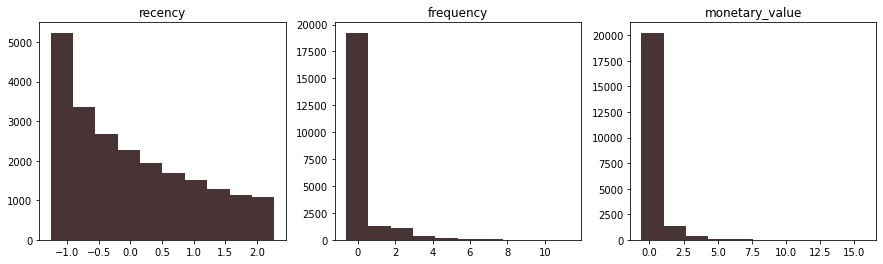

In [77]:
column=['recency','frequency','monetary_value']
def plotting_boxplot(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        plt.hist(df_std[col], color = '#483434')
        plt.title(col)
        i = i+1
    plt.show()
plotting_boxplot(column)

the data still have the same distribution 

## Clustering with K-Means

### Elbow Method

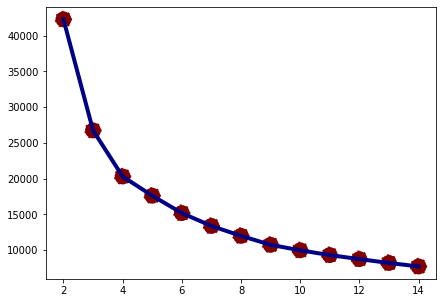

In [78]:
from sklearn.cluster import KMeans #K-Means Clustering
inertia = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))

sns.lineplot(x=range(2, 15), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

from elbow method we can see the elbow is around 3 or 4

### K-Means 

In [79]:
# Inisiasi model K-Means Clustering n = 4
kmeans = KMeans(n_clusters=4, random_state=42)

kc = kmeans.fit(df_std.values)
cluster_labels = kc.labels_

In [80]:
# Inisiasi model K-Means Clustering n = 3
kmeans = KMeans(n_clusters=3, random_state=42)

kl = kmeans.fit(df_std.values)
label_cluster = kl.labels_

In [81]:
data_cluster = df_std.assign(K_Cluster = cluster_labels)
data_label_4 = rfmSegmentation.assign(K_Cluster = cluster_labels)
data_label_3 = rfmSegmentation.assign(K_Cluster = label_cluster)

In [82]:
data_cluster.head()

,recency,frequency,monetary_value,K_Cluster
user_id,,,,
7,-0.601224,-0.286489,-0.404329,1
12,-0.853949,0.397071,-0.281998,1
18,0.399955,-0.628269,-0.407433,2
22,0.399955,-0.628269,-0.311993,2
24,-1.048353,1.080632,0.703404,3


In [83]:
data_label_4.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Class,K_Cluster
user_id,,,,,,,,,,
7,68,2,90.980000,2,3,3,233,233,Others,1
12,42,4,149.299999,2,2,2,222,222,Potential,1
18,171,1,89.500000,3,4,3,343,343,Almost Lost,2
22,171,1,135.000000,3,4,2,342,342,Almost Lost,2
24,22,6,619.080002,1,1,1,111,111,Best,3


In [84]:
data_label_3.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Class,K_Cluster
user_id,,,,,,,,,,
7,68,2,90.980000,2,3,3,233,233,Others,0
12,42,4,149.299999,2,2,2,222,222,Potential,0
18,171,1,89.500000,3,4,3,343,343,Almost Lost,2
22,171,1,135.000000,3,4,2,342,342,Almost Lost,2
24,22,6,619.080002,1,1,1,111,111,Best,0


In [85]:
data_label_4['K_Cluster'].value_counts()

1    11238
2     7367
3     3072
0      533
Name: K_Cluster, dtype: int64

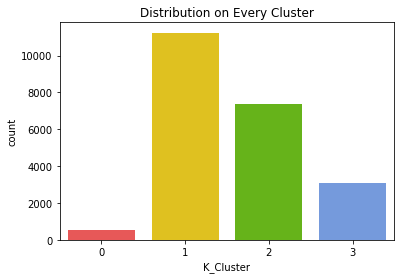

In [86]:
#pal = ["#FF4040","#FFD700", "#66CD00"]
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
pl = sns.countplot(x = data_label_4['K_Cluster'], palette= pal)
pl.set_title("Distribution on Every Cluster")
plt.show()

In [87]:
data_label_3['K_Cluster'].value_counts()


0    12499
2     7779
1     1932
Name: K_Cluster, dtype: int64

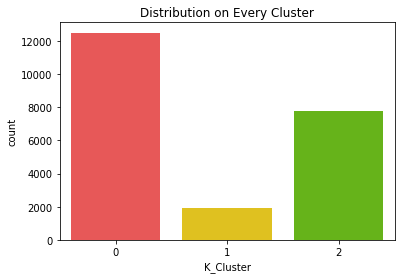

In [88]:
pal = ["#FF4040","#FFD700", "#66CD00"]
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x = data_label_3['K_Cluster'], palette= pal)
pl.set_title("Distribution on Every Cluster")
plt.show()

### Plotting RF

#### 4 Clusters

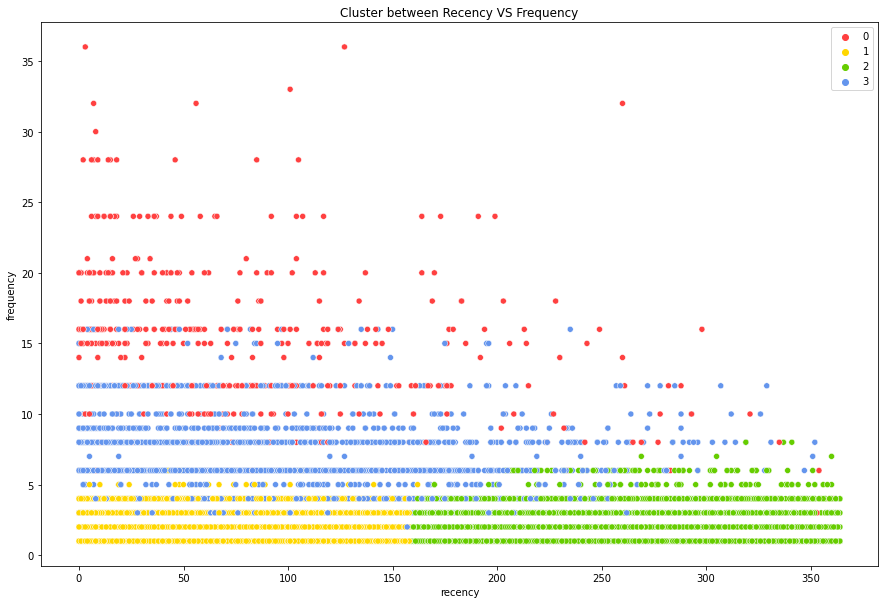

In [89]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
#pal = ["#FF4040","#FFD700", "#66CD00"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_4, x = data_label_4['recency'], y = data_label_4['frequency'], hue = data_label_4["K_Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Frequency")
plt.legend()
plt.show()

#### 3 Clusters

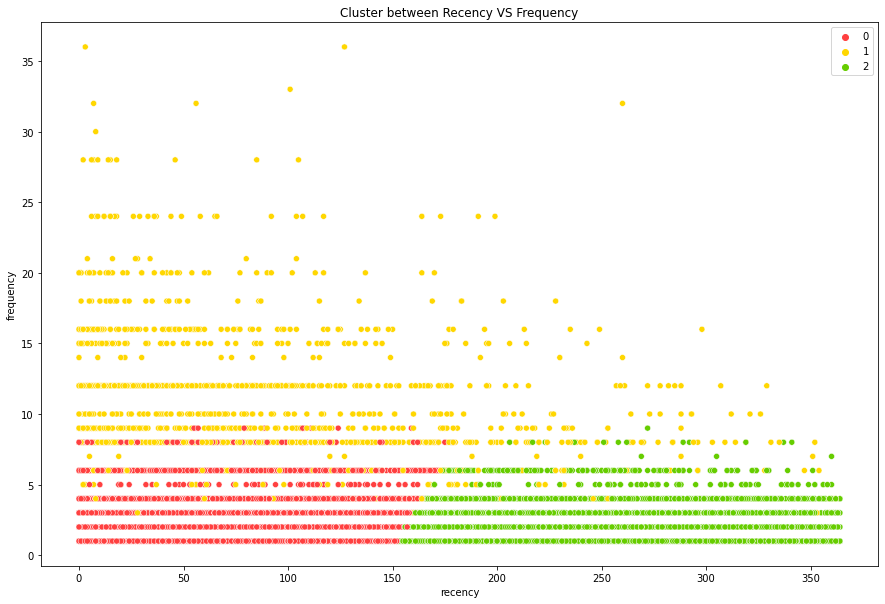

In [90]:
#Pallete

pal = ["#FF4040","#FFD700", "#66CD00"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_3, x = data_label_3['recency'], y = data_label_3['frequency'], hue = data_label_3["K_Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Frequency")
plt.legend()
plt.show()

### Plotting FM

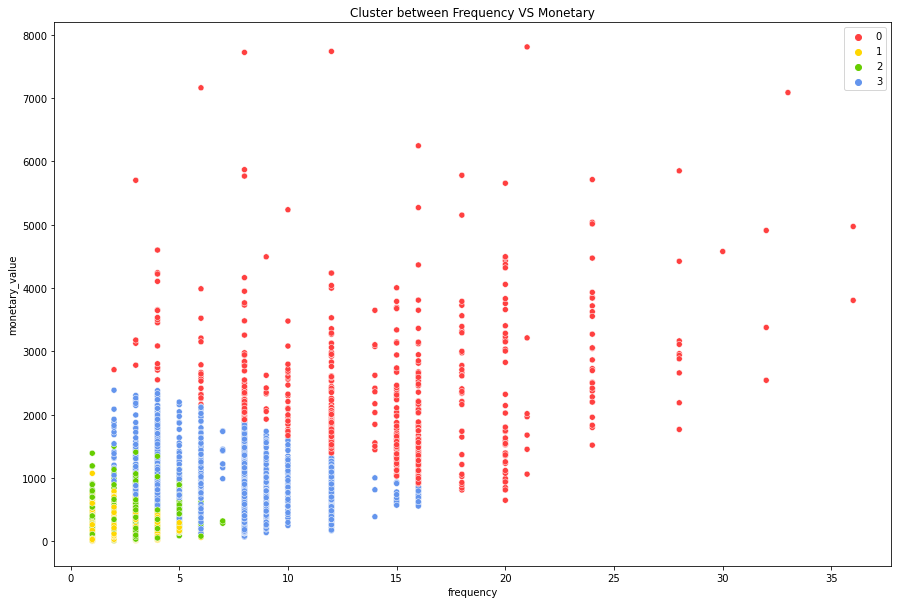

In [91]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
#pal = ["#FF4040","#FFD700", "#66CD00"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_4, x = data_label_4['frequency'], y = data_label_4['monetary_value'], hue = data_label_4["K_Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Monetary")
plt.legend()
plt.show()

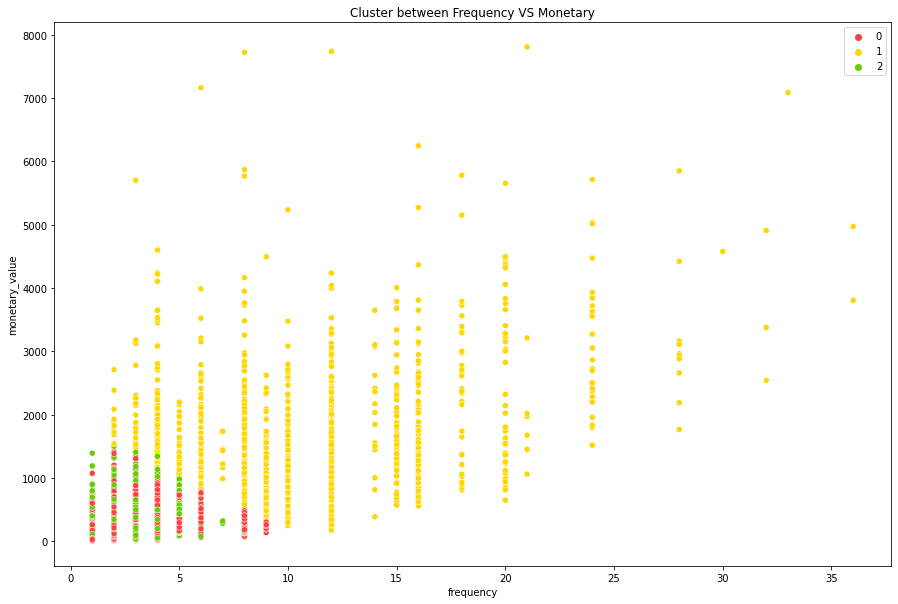

In [92]:
#Pallete

pal = ["#FF4040","#FFD700", "#66CD00"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_3, x = data_label_3['frequency'], y = data_label_3['monetary_value'], hue = data_label_3["K_Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Monetary")
plt.legend()
plt.show()

### Plotting RM

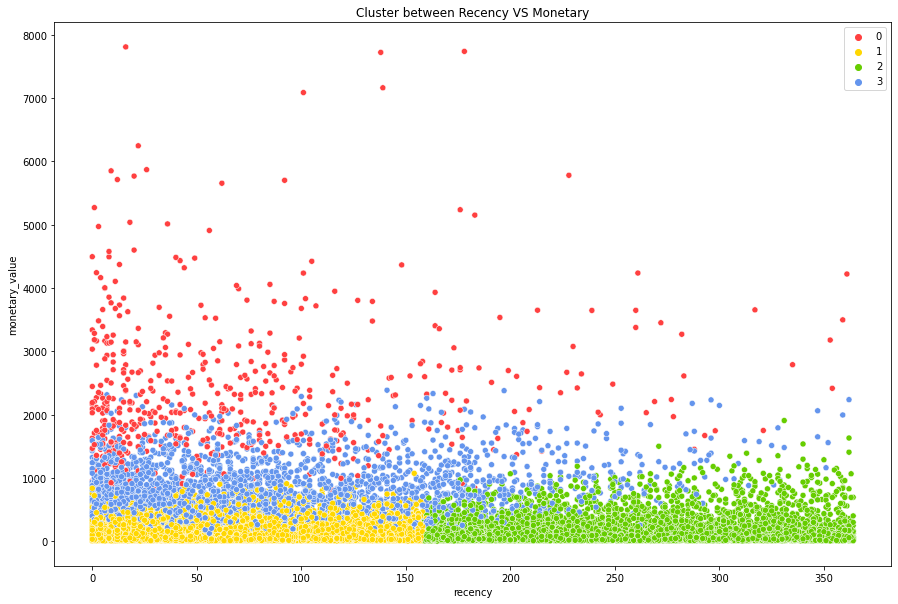

In [93]:
#Pallete

pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_4, x = data_label_4['recency'], y = data_label_4['monetary_value'], hue = data_label_4["K_Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Monetary")
plt.legend()
plt.show()

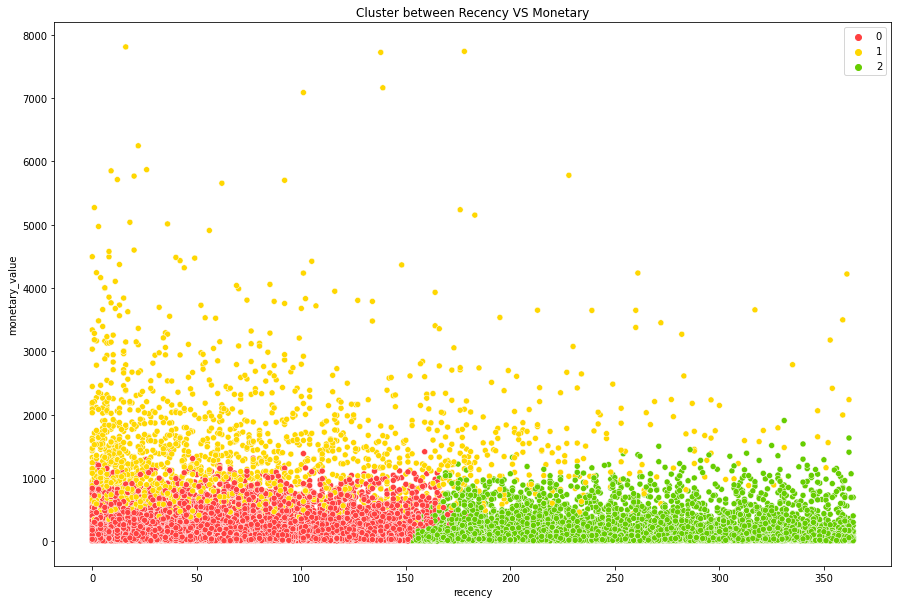

In [94]:
#Pallete

pal = ["#FF4040","#FFD700", "#66CD00"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label_3, x = data_label_3['recency'], y = data_label_3['monetary_value'], hue = data_label_3["K_Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Monetary")
plt.legend()
plt.show()

# RFM VS. K-Means

In [95]:
class0_3 = data_label_3[data_label_3['K_Cluster']==0]
class1_3 = data_label_3[data_label_3['K_Cluster']==1]
class2_3 = data_label_3[data_label_3['K_Cluster']==2]

class0_4 = data_label_4[data_label_4['K_Cluster']==0]
class1_4 = data_label_4[data_label_4['K_Cluster']==1]
class2_4 = data_label_4[data_label_4['K_Cluster']==2]
class3_4 = data_label_4[data_label_4['K_Cluster']==3]

## Cluster 4

### Distribution on Class Column

In [96]:
class0_4['Class'].unique()  

array(['Potential', 'Best', 'Big Spender'], dtype=object)

In [97]:
class0_4['Class'].value_counts() 

Best           225
Potential      173
Big Spender    135
Name: Class, dtype: int64

In [98]:
class1_4['Class'].unique() 

array(['Others', 'Potential', 'Big Spender', 'Almost Lost', 'Loyal',
       'Best'], dtype=object)

In [99]:
class1_4['Class'].value_counts() 

Others         6556
Almost Lost    2348
Big Spender    1301
Potential      1005
Loyal            27
Best              1
Name: Class, dtype: int64

In [100]:
class2_4['Class'].unique()  

array(['Almost Lost', 'Lost Cheap', 'Lost Customers', 'Big Spender',
       'Loyal'], dtype=object)

In [101]:
class2_4['Class'].value_counts() 

Lost Cheap        2665
Lost Customers    1836
Almost Lost       1810
Big Spender       1004
Loyal               52
Name: Class, dtype: int64

In [102]:
class3_4['Class'].unique() 

array(['Best', 'Potential', 'Big Spender', 'Loyal'], dtype=object)

In [103]:
class3_4['Class'].value_counts() 

Big Spender    1339
Best            782
Potential       725
Loyal           226
Name: Class, dtype: int64

### Distribution on RFMClass Column

In [104]:
class0_4['RFMClass'].unique() 

array(['211', '111', '311', '411', '121', '421', '221', '321', '131'],
      dtype=object)

In [105]:
class1_4['RFMClass'].unique() 

array(['233', '222', '232', '131', '244', '333', '132', '231', '134',
       '322', '344', '121', '343', '144', '133', '243', '221', '143',
       '142', '223', '122', '123', '224', '334', '242', '342', '234',
       '124', '332', '331', '323', '321', '241', '324', '212', '141',
       '112', '113', '341', '312', '213', '111'], dtype=object)

In [106]:
class2_4['RFMClass'].unique() 

array(['343', '342', '444', '344', '433', '422', '434', '423', '421',
       '432', '443', '322', '442', '332', '431', '341', '333', '411',
       '413', '334', '321', '412', '441', '323', '331', '424', '312',
       '311', '324'], dtype=object)

In [107]:
class3_4['RFMClass'].unique() 

array(['111', '112', '211', '321', '311', '221', '121', '212', '312',
       '411', '113', '313', '421', '131', '331', '231', '412'],
      dtype=object)

## Cluster 3

### With Class Column

In [108]:
class0_3['Class'].unique() 

array(['Others', 'Potential', 'Best', 'Big Spender', 'Almost Lost',
       'Loyal'], dtype=object)

In [109]:
class0_3['Class'].value_counts() 

Others         6556
Almost Lost    2127
Big Spender    1953
Potential      1350
Best            277
Loyal           236
Name: Class, dtype: int64

In [110]:
class1_3['Class'].unique() 

array(['Potential', 'Best', 'Big Spender', 'Loyal'], dtype=object)

In [111]:
class1_3['Class'].value_counts() 

Best           731
Big Spender    644
Potential      553
Loyal            4
Name: Class, dtype: int64

In [112]:
class2_3['Class'].unique() 

array(['Almost Lost', 'Lost Cheap', 'Lost Customers', 'Big Spender',
       'Loyal'], dtype=object)

In [113]:
class2_3['Class'].value_counts() 

Lost Cheap        2665
Almost Lost       2031
Lost Customers    1836
Big Spender       1182
Loyal               65
Name: Class, dtype: int64

### With RFMClass Column

In [114]:
class0_3['RFMClass'].unique() 

array(['233', '222', '111', '232', '112', '131', '244', '333', '132',
       '231', '134', '322', '121', '343', '144', '211', '133', '243',
       '221', '143', '321', '142', '223', '122', '123', '224', '334',
       '242', '344', '342', '234', '124', '332', '331', '212', '323',
       '312', '311', '113', '241', '324', '313', '141', '341', '213'],
      dtype=object)

In [115]:
class1_3['RFMClass'].unique() 

array(['211', '111', '311', '221', '121', '212', '411', '321', '421',
       '131', '112', '331', '231', '312'], dtype=object)

In [116]:
class2_3['RFMClass'].unique() 

array(['343', '342', '444', '344', '433', '422', '434', '423', '421',
       '432', '443', '322', '442', '332', '431', '341', '311', '411',
       '323', '333', '413', '334', '321', '312', '412', '441', '331',
       '424', '324'], dtype=object)

not labeling the k-means segment because it keeps changing every time we re run the code, so at first segment 0 is type best segment but after we rerun the code, it become the middle or worst



---



**BUSINESS IMPLEMENTATION**

menurut saya, kalau perusahaan memiliki kekurangan dana atau mau bener-bener spend money buat yg penting-penting aja, better ngikutin yang rfm 8 kelas, why?? karna memang hasilnya ngga akurat yang kalo yang segmentasi k-means 3 atau 4, bisa dilihat dari hasil segementasi, masing-masing kelas masih memiliki miss komposisi, misal, harusnya itu kelas attention, jadi kita harus spend banyak disana biar ga jadi lost, tapi ternyata kompoisi terbanyak itu malah yang others, sedangkan other tu baru-baru aja belanja di kita, tapi malah kita spend banyak disana, yang harusnya kita bisa save money disana buat customer2 lain. dari pada nanti udah pake k-means terus kita harus analisis spesifikasi, lebih baik langsung spesifik aja. jadi kita bisa hindari untuk buang-buang duit ke others, lost, dan lost cheap.


dan juga karna waktu untuk final project ini 3 minggu, jadi masih ada waktu untuk checking manual dan spesifikasi segment, namun kalau tujuannya untuk analisis dalam waktu yg cepat atau automatisasi, better pake k-means, nanti bisa dilihat lagi distribusi datanya

# Post Analysis

this post analysis made to know how's the distribution of each segment on others variable

In [117]:
data_segment = rfmSegmentation[['RFMClass', 'Class']]

In [118]:
data_analyze = data.merge(data_segment, how = 'outer', on ='user_id')

In [119]:
data_analyze.head()

,user_id,age,gender,country,source,order_id,quantity,created_at,product_id,price,category,date,RFMClass,Class
0,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,4715,58.000000,Jeans,2021-12-31,211,Potential
1,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,11341,79.989998,Intimates,2021-12-31,211,Potential
2,13833,45,F,China,Search,17103,1,2021-12-31 00:27:00,12397,30.950001,Intimates,2021-12-31,211,Potential
3,13833,45,F,China,Search,17102,3,2022-10-11 00:27:00,4715,58.000000,Jeans,2022-10-11,211,Potential
4,13833,45,F,China,Search,17102,3,2022-10-11 00:27:00,11341,79.989998,Intimates,2022-10-11,211,Potential


In [120]:
#data_analyze.to_csv('data_segmented2.csv', header=True, index=False)

In [121]:
#from google.colab import files
#data_analyze.to_csv('data_segmented2.csv', header=True, index=False) 
#files.download('data_segmented2.csv')

In [122]:
best_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Best']
potential_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Potential']
loyal_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Loyal']
bigspender_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Big Spender']
others_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Others']
almostlost_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Almost Lost']
lost_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Lost Customers']
lostcheap_customer = rfmSegmentation[rfmSegmentation['Class'] == 'Lost Cheap']

**Best Customer**

In [123]:
best_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,1008.00000,1008.000000,1008.000000,1008.0,1008.0,1008.0,1008.0
mean,15.81746,9.858135,1096.065923,1.0,1.0,1.0,111.0
std,11.61713,4.484411,887.946701,0.0,0.0,0.0,0.0
min,0.00000,5.000000,309.900009,1.0,1.0,1.0,111.0
25%,6.00000,6.000000,539.877489,1.0,1.0,1.0,111.0
50%,14.00000,8.000000,804.390009,1.0,1.0,1.0,111.0
75%,25.00000,12.000000,1323.017506,1.0,1.0,1.0,111.0
max,39.00000,36.000000,7806.559998,1.0,1.0,1.0,111.0


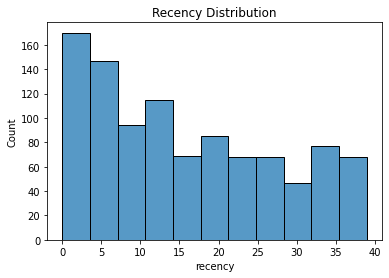

In [124]:
sns.histplot(best_customer['recency'])
plt.title('Recency Distribution')
plt.show()

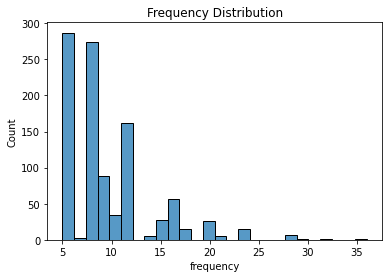

In [125]:
sns.histplot(best_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

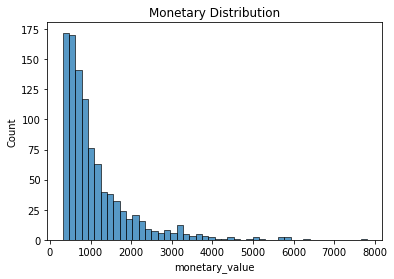

In [126]:
sns.histplot(best_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Potential_customer**

In [127]:
potential_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,51.548082,6.161324,570.827999,1.650026,1.521282,1.597478,181.812927
std,30.718553,3.792978,700.175507,0.477087,0.499678,0.490535,45.766284
min,0.000000,3.000000,118.469999,1.000000,1.000000,1.000000,112.000000
25%,25.000000,4.000000,188.970000,1.000000,1.000000,1.000000,122.000000
50%,52.000000,4.000000,269.969999,2.000000,2.000000,2.000000,211.000000
75%,77.000000,8.000000,656.500003,2.000000,2.000000,2.000000,211.000000
max,107.000000,33.000000,7085.610019,2.000000,2.000000,2.000000,222.000000


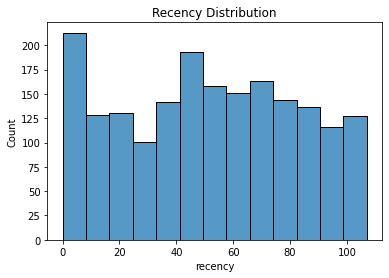

In [128]:
sns.histplot(potential_customer['recency'])
plt.title('Recency Distribution')
plt.show()

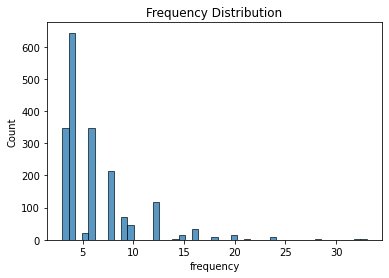

In [129]:
sns.histplot(potential_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

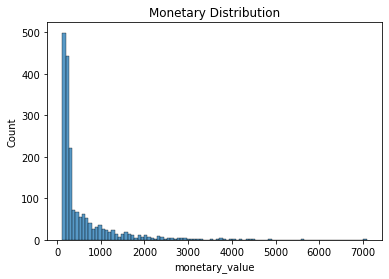

In [130]:
sns.histplot(potential_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Loyal Customer**

In [131]:
loyal_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000
mean,122.668852,6.386885,218.916230,2.590164,1.0,2.062295,271.078689
std,76.844716,1.133154,59.300920,0.777501,0.0,0.242088,77.715746
min,0.000000,5.000000,61.639999,1.000000,1.0,2.000000,113.000000
25%,62.000000,6.000000,179.879997,2.000000,1.0,2.000000,212.000000
50%,99.000000,6.000000,225.000000,2.000000,1.0,2.000000,212.000000
75%,161.000000,6.000000,267.959999,3.000000,1.0,2.000000,312.000000
max,358.000000,12.000000,309.060001,4.000000,1.0,3.000000,413.000000


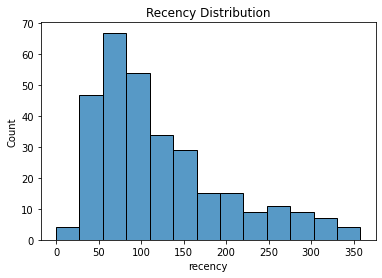

In [132]:
sns.histplot(loyal_customer['recency'])
plt.title('Recency Distribution')
plt.show()

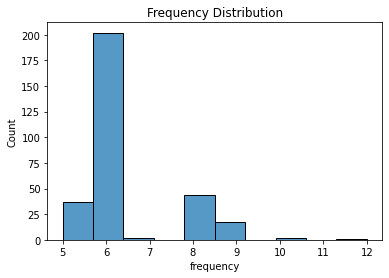

In [133]:
sns.histplot(loyal_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

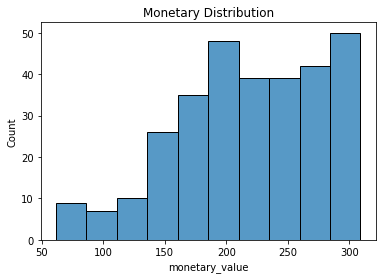

In [134]:
sns.histplot(loyal_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Big Spender**

In [135]:
bigspender_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.0,3779.00000
mean,141.060333,4.108759,716.486372,2.663403,2.094205,1.0,288.28235
std,98.815200,2.713723,547.086661,1.070052,0.739218,0.0,105.83129
min,0.000000,1.000000,309.199997,1.000000,1.000000,1.0,121.00000
25%,54.000000,2.000000,397.500000,2.000000,2.000000,1.0,221.00000
50%,132.000000,4.000000,545.959991,3.000000,2.000000,1.0,311.00000
75%,212.000000,4.000000,825.399994,4.000000,3.000000,1.0,411.00000
max,364.000000,36.000000,7736.000000,4.000000,4.000000,1.0,441.00000


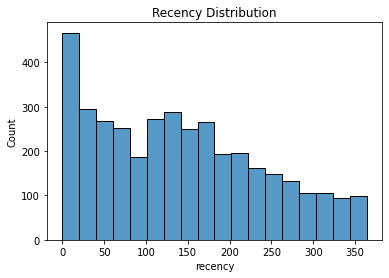

In [136]:
sns.histplot(bigspender_customer['recency'])
plt.title('Recency Distribution')
plt.show()

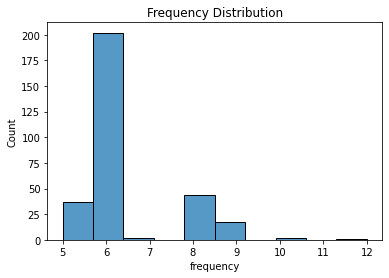

In [137]:
sns.histplot(loyal_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

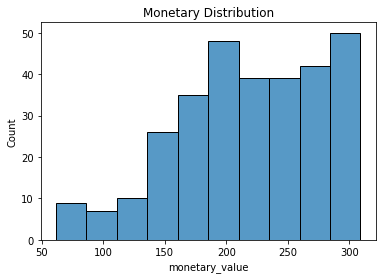

In [138]:
sns.histplot(loyal_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Others Customers**

In [139]:
others_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000
mean,45.646278,1.588621,84.438467,1.523490,3.446004,3.127669,189.936699
std,31.383489,0.728154,66.855753,0.499486,0.629783,0.764800,50.636198
min,0.000000,1.000000,1.950000,1.000000,2.000000,2.000000,123.000000
25%,18.000000,1.000000,33.980000,1.000000,3.000000,3.000000,142.000000
50%,42.000000,1.000000,64.805000,2.000000,4.000000,3.000000,223.000000
75%,71.000000,2.000000,113.909999,2.000000,4.000000,4.000000,242.000000
max,107.000000,4.000000,308.000000,2.000000,4.000000,4.000000,244.000000


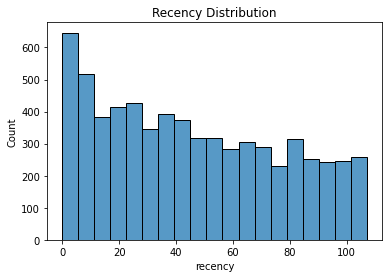

In [140]:
sns.histplot(others_customer['recency'])
plt.title('Recency Distribution')
plt.show()

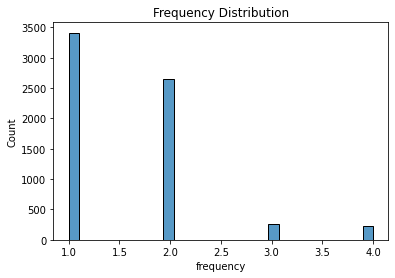

In [141]:
sns.histplot(others_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

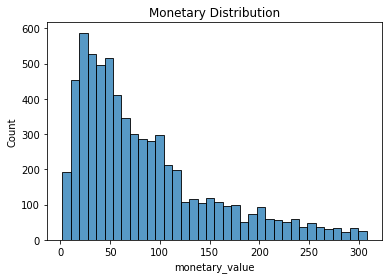

In [142]:
sns.histplot(others_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Almost Lost**

In [143]:
almostlost_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,4158.000000,4158.000000,4158.000000,4158.0,4158.000000,4158.000000,4158.000000
mean,154.169793,1.651275,92.984440,3.0,3.418711,3.040404,337.227513
std,28.280189,0.872473,72.919201,0.0,0.705323,0.808187,7.511210
min,108.000000,1.000000,1.950000,3.0,2.000000,2.000000,322.000000
25%,129.000000,1.000000,34.990002,3.0,3.000000,2.000000,332.000000
50%,152.000000,1.000000,71.009998,3.0,4.000000,3.000000,342.000000
75%,178.000000,2.000000,134.965003,3.0,4.000000,4.000000,344.000000
max,206.000000,4.000000,309.090005,3.0,4.000000,4.000000,344.000000


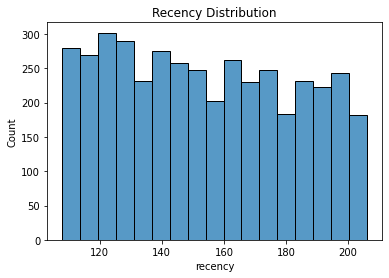

In [144]:
sns.histplot(almostlost_customer['recency'])
plt.title('Recency Distribution')
plt.show()

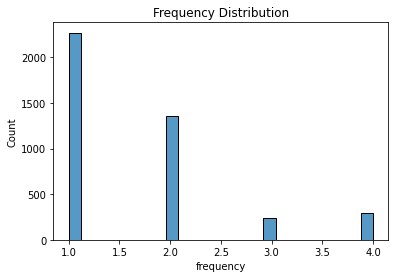

In [145]:
sns.histplot(almostlost_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

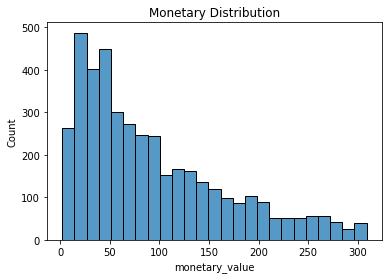

In [146]:
sns.histplot(almostlost_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Lost Customers**

In [147]:
lost_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,1836.000000,1836.000000,1836.000000,1836.0,1836.000000,1836.000000,1836.000000
mean,277.829521,2.090414,154.340872,4.0,2.996732,2.308279,432.275599
std,46.006655,0.815046,64.946595,0.0,0.641006,0.467770,6.353636
min,207.000000,1.000000,26.969999,4.0,2.000000,2.000000,422.000000
25%,237.000000,2.000000,105.627501,4.0,3.000000,2.000000,432.000000
50%,275.000000,2.000000,147.974999,4.0,3.000000,2.000000,432.000000
75%,316.000000,2.000000,196.057503,4.0,3.000000,3.000000,433.000000
max,364.000000,4.000000,308.980000,4.0,4.000000,4.000000,442.000000


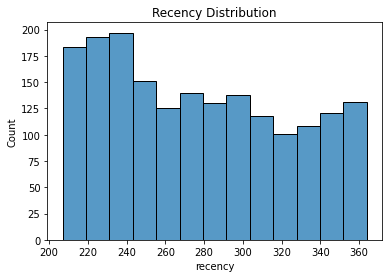

In [148]:
sns.histplot(lost_customer['recency'])
plt.title('Recency Distribution')
plt.show()

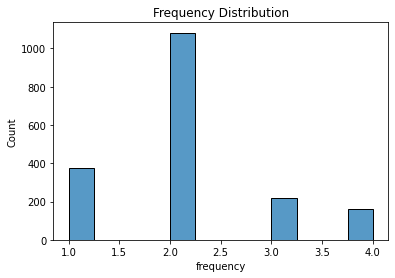

In [149]:
sns.histplot(lost_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

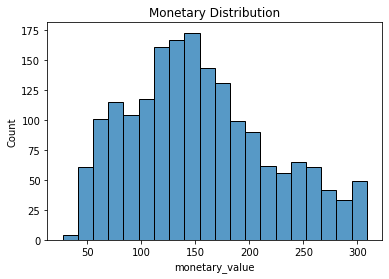

In [150]:
sns.histplot(lost_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

**Lost Cheap**

In [151]:
lostcheap_customer.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Segment
count,2665.000000,2665.000000,2665.000000,2665.0,2665.000000,2665.000000,2665.000000
mean,281.098687,1.043527,42.319584,4.0,3.956473,3.643152,443.207880
std,45.072535,0.204079,25.652700,0.0,0.204079,0.479159,2.020803
min,207.000000,1.000000,1.950000,4.0,3.000000,3.000000,434.000000
25%,243.000000,1.000000,23.629999,4.0,4.000000,3.000000,443.000000
50%,278.000000,1.000000,36.880001,4.0,4.000000,4.000000,444.000000
75%,319.000000,1.000000,56.000000,4.0,4.000000,4.000000,444.000000
max,364.000000,2.000000,118.000000,4.0,4.000000,4.000000,444.000000


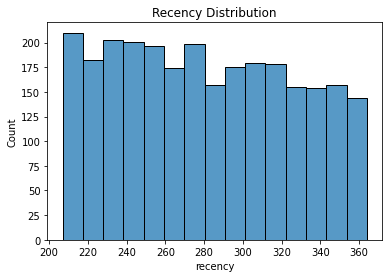

In [152]:
sns.histplot(lostcheap_customer['recency'])
plt.title('Recency Distribution')
plt.show()

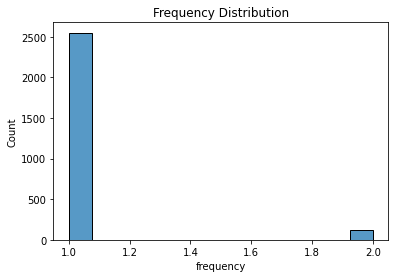

In [153]:
sns.histplot(lostcheap_customer['frequency'])
plt.title('Frequency Distribution')
plt.show()

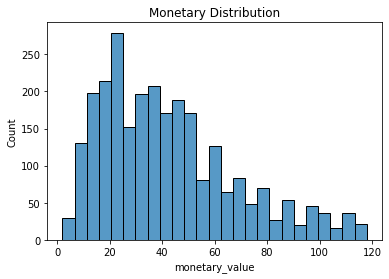

In [154]:
sns.histplot(lostcheap_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

semua distribusi tidak normal, maka lebih baik melihat mediannya

In [155]:
lostcheap_customer['recency'].median()

278.0

### By Recency

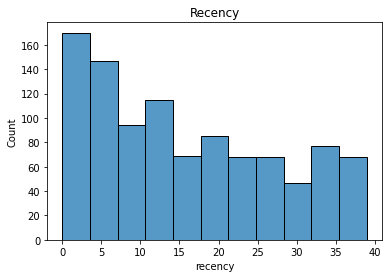

In [156]:
sns.histplot(best_customer['recency'])
plt.title('Recency')
plt.show()

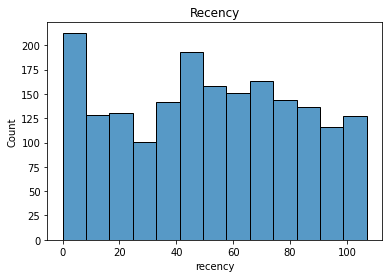

In [157]:
sns.histplot(potential_customer['recency'])
plt.title('Recency')
plt.show()

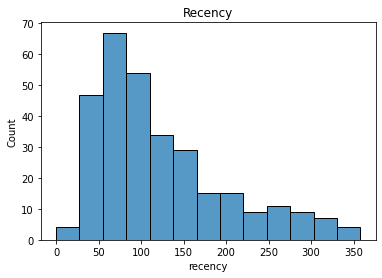

In [158]:
sns.histplot(loyal_customer['recency'])
plt.title('Recency')
plt.show()

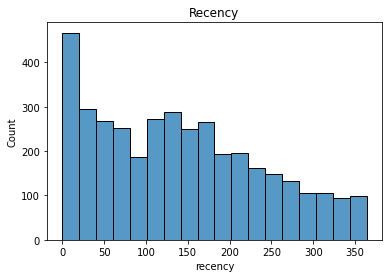

In [159]:
sns.histplot(bigspender_customer['recency'])
plt.title('Recency')
plt.show()

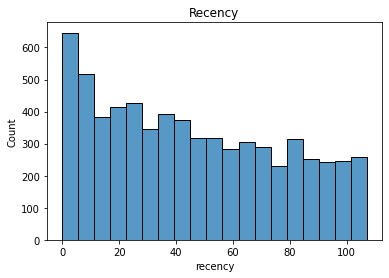

In [160]:
sns.histplot(others_customer['recency'])
plt.title('Recency')
plt.show()

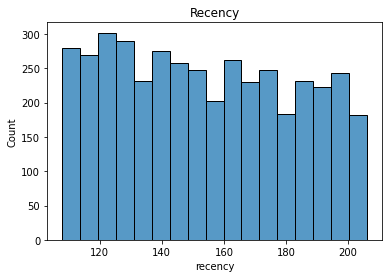

In [161]:
sns.histplot(almostlost_customer['recency'])
plt.title('Recency')
plt.show()

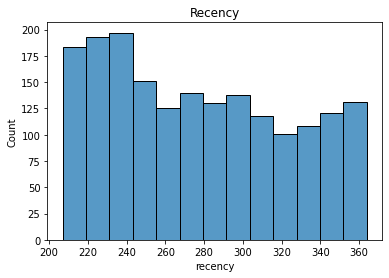

In [162]:
sns.histplot(lost_customer['recency'])
plt.title('Recency')
plt.show()

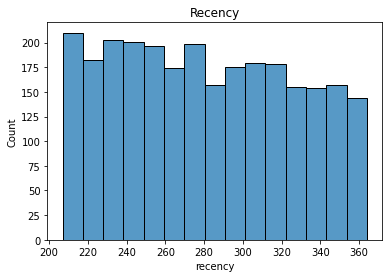

In [163]:
sns.histplot(lostcheap_customer['recency'])
plt.title('Recency')
plt.show()

### By Monetary

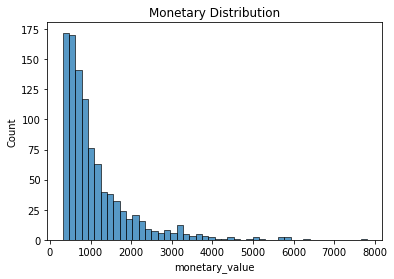

In [164]:
sns.histplot(best_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

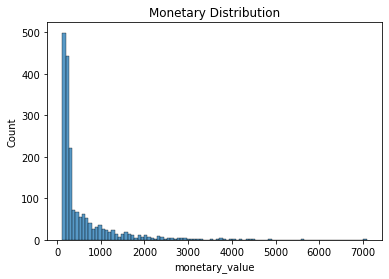

In [165]:
sns.histplot(potential_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

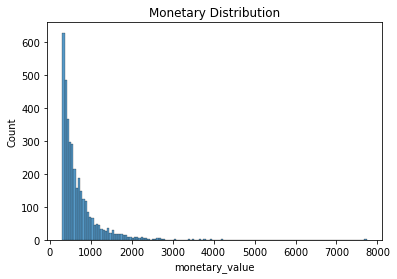

In [166]:
sns.histplot(bigspender_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

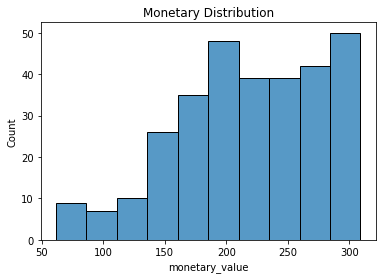

In [167]:
sns.histplot(loyal_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

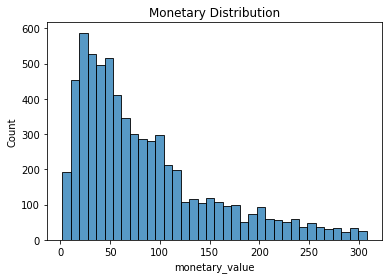

In [168]:
sns.histplot(others_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

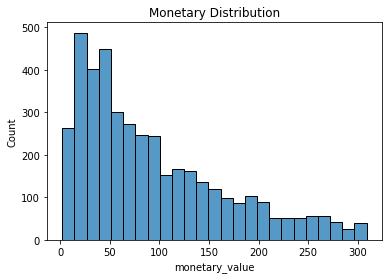

In [169]:
sns.histplot(almostlost_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

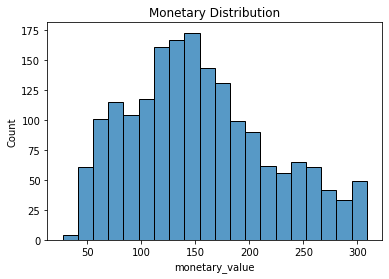

In [170]:
sns.histplot(lost_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

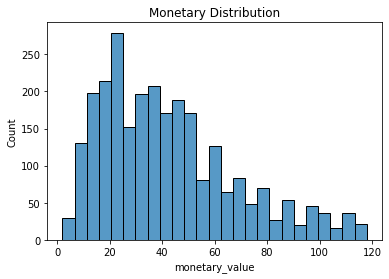

In [171]:
sns.histplot(lostcheap_customer['monetary_value'])
plt.title('Monetary Distribution')
plt.show()

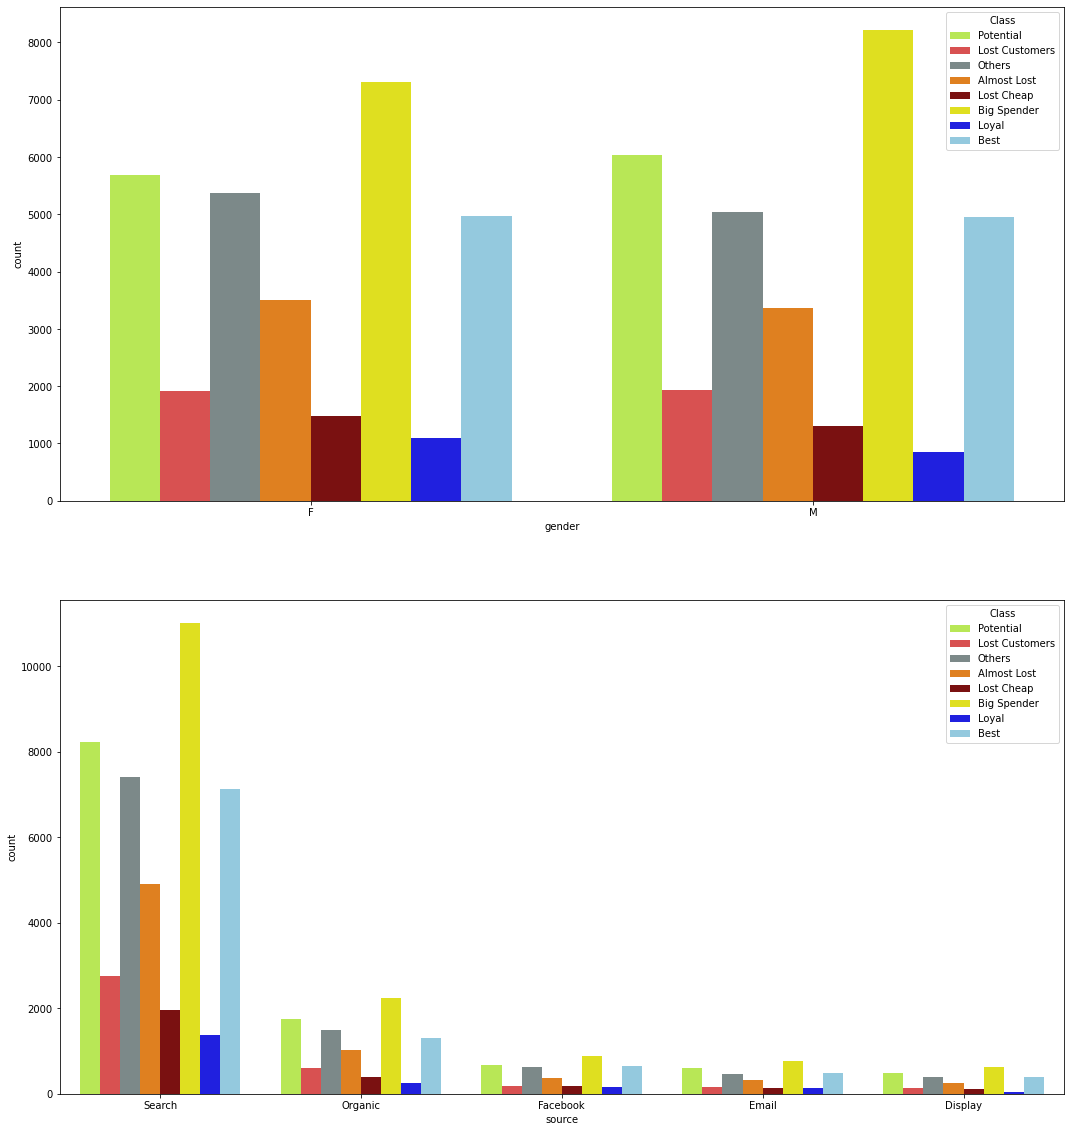

In [172]:
num_var =['gender', 'source']
pal = ['#C0FF3E', '#EE3B3B', '#7A8B8B', '#FF8000', '#8B0000', '#FFFF00', '#0000FF', '#87CEEB']
fig, axes = plt.subplots(2, 1, figsize=(18, 20))
for num, ax in zip(num_var, axes.flatten()):
    sns.countplot(num, data=data_analyze, hue='Class', ax=ax, palette = pal)



---



**Recommendation**

- Best Customer 	 : Reward them. give a loyalty program to keep them become our best customer
- Potential Customer : Offer membership / loyalty program, recommend other products.
- Big Spender 	 : Upsell higher value or pricy products.
- Loyal Customer 	 : Offer bundling product, to increase the monetary and become big spender/potential customer.
- Almost Lost 		 : Share valuable resources, recommend popular products / renewals at discount, reconnect with them.
- Lost Customer	 : Optional to targeted
- Lost Cheap 		 : ignore, it spend lot of budget to reconnect.
- Others		 : Optional to targeted/recommend products